#### Librerias

In [417]:
#Librerias generales
import pandas as pd
import numpy as np

#Librerias procesamiento de datos
from datetime import datetime, timedelta

#Librerias para gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


#### Configuración

In [418]:
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['font.size'] = 12

#### Carga de data

In [419]:
df = pd.read_csv('/Users/n.arcos89/Documents/GitHub/upgrade-hub-marketing-analysis/Data/marketingcampaigns.csv', on_bad_lines='skip')

#### Aproximación al dataframe

In [420]:
#comprobamos las dos primeras filas del dataframe
df.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10


In [421]:
#compromabos las dos últimas filas del dataframe
df.tail(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.6,webinar,B2B,paid,0.7,90000.0
1031,Too many conversions,2023-05-01,2023-11-01,40000,0.8,social media,B2C,organic,1.5,120000.0


In [422]:
#comprobamos la extensión del dataset
df.shape

(1032, 10)

In [423]:
#conocemos las columnas del df
df.columns

Index(['campaign_name', 'start_date', 'end_date', 'budget', 'roi', 'type',
       'target_audience', 'channel', 'conversion_rate', 'revenue'],
      dtype='object')

In [424]:
#conocemos los tipos de datos del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [425]:
#hacemos un resumen estadístico de las variables numéricas
df.describe()

,roi,conversion_rate,revenue
count,1028.000000,1028.000000,1029.000000
mean,0.533804,0.541936,511591.195277
std,0.261869,0.267353,287292.729847
min,-0.200000,0.000000,108.210000
25%,0.310000,0.300000,267820.250000
50%,0.530000,0.550000,518001.770000
75%,0.760000,0.770000,765775.140000
max,0.990000,1.500000,999712.490000


In [426]:
#todas las variables
df.describe(include='all')

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
count,1032,1031,1030,1029,1028.000000,1031,1030,1031,1028.000000,1029.000000
unique,1014,347,347,1011,NaN,6,3,4,NaN,NaN
top,User-friendly client-driven service-desk,2023-07-07,2023-10-09,8082.3,NaN,email,B2B,promotion,NaN,NaN
freq,3,9,9,4,NaN,288,529,280,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.533804,NaN,NaN,NaN,0.541936,511591.195277
std,NaN,NaN,NaN,NaN,0.261869,NaN,NaN,NaN,0.267353,287292.729847
min,NaN,NaN,NaN,NaN,-0.200000,NaN,NaN,NaN,0.000000,108.210000
25%,NaN,NaN,NaN,NaN,0.310000,NaN,NaN,NaN,0.300000,267820.250000
50%,NaN,NaN,NaN,NaN,0.530000,NaN,NaN,NaN,0.550000,518001.770000
75%,NaN,NaN,NaN,NaN,0.760000,NaN,NaN,NaN,0.770000,765775.140000


#### Limpieza de los datos

In [427]:
#conocer datos duplicados 
df.duplicated().sum()

np.int64(15)

In [428]:
#eliminar datos duplicados
df.drop_duplicates(inplace=True)

In [429]:
#conocer datos nulos
df.isnull().sum()

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64

In [430]:
#calcular porcentaje datos nulos
df.isnull().sum()/len(df)*100

campaign_name      0.000000
start_date         0.098328
end_date           0.196657
budget             0.294985
roi                0.393314
type               0.098328
target_audience    0.196657
channel            0.098328
conversion_rate    0.393314
revenue            0.294985
dtype: float64

<Axes: >

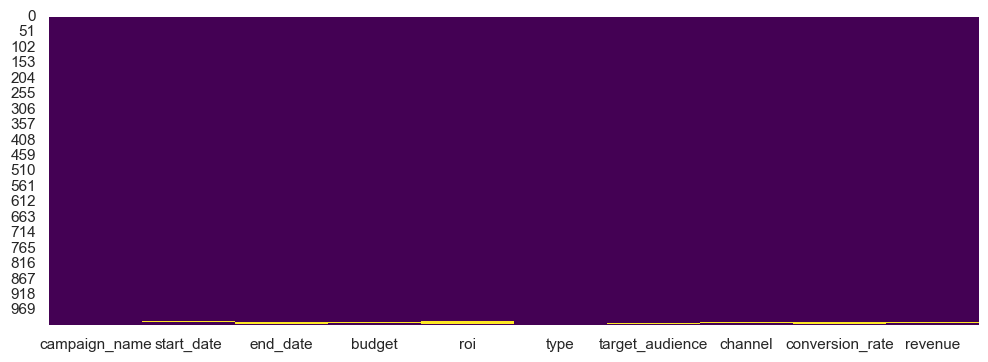

In [431]:
#comprobar visualmente los datos nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

#### Eliminamos datos nulos

In [432]:
df_limpio= df.copy()

In [433]:
#convertimos la columba a float
df_limpio['budget'] = pd.to_numeric(df_limpio['budget'], errors='coerce')

In [434]:
#Reparamos los valores nulos de la columna budget
budget_mediana= df_limpio['budget'].median() #calculamos la mediana de la columna budget

In [435]:
#reemplazamos los valores nulos de la columna budget por 'Unknown'
df_limpio ['budget'] = df_limpio['budget'].fillna('Unknown')

In [436]:
#comprobamos
df_limpio ['budget'].isnull().sum()

np.int64(0)

In [437]:
#reemplazamos los valores nulos de la columna type por 'Unknown'
df_limpio ['type'] = df_limpio['type'].fillna('Unknown')


In [438]:
#comprobamos
df_limpio ['type'].isnull().sum()

np.int64(0)

In [439]:
#hacemos lo mismo con channel y target_audience
df_limpio ['channel'] = df_limpio['channel'].fillna('Unknown')
df_limpio ['target_audience'] = df_limpio['target_audience'].fillna('Unknown')

In [440]:
#comprobamos
df_limpio ['channel'].isnull().sum()


np.int64(0)

In [441]:
df_limpio ['target_audience'].isnull().sum()

np.int64(0)

In [442]:
df_limpio['roi'] = pd.to_numeric(df_limpio['roi'], errors='coerce')


In [443]:
#recurrimos al método KNN para ser más precisos en la imputación de los valores nulos en las columnas roi, conversion_rate y revenue
from sklearn.impute import KNNImputer

# Columnas que necesitas imputación
numerical_columns = ['roi', 'conversion_rate', 'revenue']

# Crear KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Trasnformación
df_limpio[numerical_columns] = imputer.fit_transform(df_limpio[numerical_columns])

# Comprobación
print("Porcentaje de nulos después de la imputación:")
print(df_limpio[numerical_columns].isnull().sum() / df_limpio.shape[0] * 100)

# Mostrar los datos
df_limpio[numerical_columns].head()

Porcentaje de nulos después de la imputación:
roi                0.0
conversion_rate    0.0
revenue            0.0
dtype: float64


,roi,conversion_rate,revenue
0,0.35,0.40,709593.48
1,0.74,0.66,516609.10
2,0.37,0.28,458227.42
3,0.47,0.19,89958.73
4,0.30,0.81,47511.35


In [444]:
#comprobamos el estado de nuestros datos nulos
df_limpio.isnull().sum()/len(df_limpio)*100

campaign_name      0.000000
start_date         0.098328
end_date           0.196657
budget             0.000000
roi                0.000000
type               0.000000
target_audience    0.000000
channel            0.000000
conversion_rate    0.000000
revenue            0.000000
dtype: float64

In [445]:
df_limpio.head(2)

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10


In [446]:
# Conversión de fechas a datetime
df_limpio['start_date'] = pd.to_datetime(df_limpio['start_date'], errors='coerce', utc=True)
df_limpio['end_date'] = pd.to_datetime(df_limpio['end_date'],   errors='coerce', utc=True)


In [447]:
# Calcular duration_days temporalmente para obtener la mediana
temp_duration = (df_limpio['end_date'] - df_limpio['start_date']).dt.days
median_dur = int(temp_duration.median())

# Rellenar valores faltantes en start_date con una fecha calculada
df_limpio['start_date'].fillna(df_limpio['end_date'] - pd.Timedelta(days=median_dur), inplace=True)

# Ahora calcular la duración en días
df_limpio['duration_days'] = (df_limpio['end_date'] - df_limpio['start_date']).dt.days
print(f"Mediana de duración: {median_dur} días")



Mediana de duración: 364 días


/var/folders/qj/w1prc6gn25l836z9b7mn6x940000gn/T/ipykernel_1068/4014609017.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['start_date'].fillna(df_limpio['end_date'] - pd.Timedelta(days=median_dur), inplace=True)


In [448]:
# 3) Imputar start_date faltantes (pero sí tienen end_date)
mask_start_missing = df_limpio['start_date'].isna() & df_limpio['end_date'].notna()
df.loc[mask_start_missing, 'start_date'] = (
    df.loc[mask_start_missing, 'end_date'] - pd.Timedelta(days=median_dur)
)

# 4) Imputar end_date faltantes (pero sí tienen start_date)
mask_end_missing = df_limpio['end_date'].isna() & df['start_date'].notna()
df_limpio.loc[mask_end_missing, 'end_date'] = (
    df_limpio.loc[mask_end_missing, 'start_date'] + pd.Timedelta(days=median_dur)
)

# 5) Imputar ambas fechas para “Typo in Date”
min_start = df_limpio['start_date'].min()  # la fecha más antigua tras imputación previa
mask_typo = df_limpio['campaign_name'] == "Typo in Date"
df_limpio.loc[mask_typo, 'start_date'] = min_start
df_limpio.loc[mask_typo, 'end_date']   = min_start + pd.Timedelta(days=median_dur)

In [449]:
#comprobamos el estado de nuestros datos nulos
df_limpio.isnull().sum()/len(df_limpio)*100

campaign_name      0.000000
start_date         0.000000
end_date           0.000000
budget             0.000000
roi                0.000000
type               0.000000
target_audience    0.000000
channel            0.000000
conversion_rate    0.000000
revenue            0.000000
duration_days      0.294985
dtype: float64

In [450]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce', utc=True)
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce', utc=True)
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days

In [451]:
# Verificar que no queden valores nulos en 'duration_days'
print(df_limpio['duration_days'].isnull().sum())

3


In [452]:
#reemplazamos los valores nulos de la columna duration-days por 'Sin Datos'
df_limpio ['duration_days'] = df_limpio['duration_days'].fillna('Sin Datos')

In [453]:
#comprobamos el estado de nuestros datos nulos
df_limpio.isnull().sum()/len(df_limpio)*100
# ...existing code...

campaign_name      0.0
start_date         0.0
end_date           0.0
budget             0.0
roi                0.0
type               0.0
target_audience    0.0
channel            0.0
conversion_rate    0.0
revenue            0.0
duration_days      0.0
dtype: float64

In [454]:
df_limpio['budget'] = pd.to_numeric(df_limpio['budget'], errors='coerce')
df_limpio['roi'] = (df_limpio['revenue'] - df_limpio['budget']) / df_limpio['budget'] * 100


In [485]:
#redondeamos a 2 decimales
df_limpio['roi'] = df_limpio['roi'].round(2)


In [486]:
#comprobamos
df_limpio['roi']

0        8679.6%%
1       2816.56%%
2        441.36%%
3        516.59%%
4         20.92%%
          ...    
1027    1362.83%%
1028      200.0%%
1029        nan%%
1030       50.0%%
1031      200.0%%
Name: roi, Length: 1017, dtype: object

In [487]:
#comprobamos si existen valores nulos en la nueva columna roi
df_limpio['roi'].isnull().sum()

np.int64(0)

#### Comprobamos errores en el texto y reemplazamos

In [457]:
# Comprobar los valores únicos en la columna 'type'
print(df_limpio['type'].unique())

['email' 'podcast' 'webinar' 'social media' 'Unknown' 'event' 'B2B']


In [458]:
#reemplazar las filas que contengan 'referral' por 'referral'
df_limpio['channel'] = df_limpio['channel'].replace('referral', 'Referral')

In [459]:
# Comprobar los valores únicos en la columna 'channel'
print(df_limpio['channel'].unique())

['organic' 'promotion' 'paid' 'Referral' 'Unknown']


In [460]:
# Comprobar los valores únicos en la columna 'target_audience'
print(df_limpio['target_audience'].unique())

['B2B' 'B2C' 'social media' 'Unknown']


In [461]:
#reemplazar las filas que contengan errores tipograficos
df_limpio['target_audience'] = df_limpio['target_audience'].replace('b2b', 'B2B')
df_limpio['target_audience'] = df_limpio['target_audience'].replace('b2c', 'B2C')

In [462]:
#Sustuir los valores 'social media' de la columna target_audience por 'Unknown'ArithmeticError
df_limpio['target_audience'] = df_limpio['target_audience'].replace('social media', 'Unknown')

In [463]:
# Comprobar los valores únicos en la columna 'target_audience'
print(df_limpio['target_audience'].unique())

['B2B' 'B2C' 'Unknown']


#### Crear una nueva columna con el beneficio neto

In [464]:
df_limpio['beneficio_neto'] = df_limpio['revenue'] - df_limpio['budget']

In [465]:
df_limpio

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,duration_days,beneficio_neto
0,Public-key multi-tasking throughput,2023-04-01 00:00:00+00:00,2024-02-23 00:00:00+00:00,8082.30,8679.6%,email,B2B,organic,0.400,709593.480,328.0,701511.180
1,De-engineered analyzing task-force,2023-02-15 00:00:00+00:00,2024-04-22 00:00:00+00:00,17712.98,2816.56%,email,B2C,promotion,0.660,516609.100,432.0,498896.120
2,Balanced solution-oriented Local Area Network,2022-12-20 00:00:00+00:00,2023-10-11 00:00:00+00:00,84643.10,441.36%,podcast,B2B,paid,0.280,458227.420,295.0,373584.320
3,Distributed real-time methodology,2022-09-26 00:00:00+00:00,2023-09-27 00:00:00+00:00,14589.75,516.59%,webinar,B2B,organic,0.190,89958.730,366.0,75368.980
4,Front-line executive infrastructure,2023-07-07 00:00:00+00:00,2024-05-15 00:00:00+00:00,39291.90,20.92%,social media,B2B,promotion,0.810,47511.350,313.0,8219.450
...,...,...,...,...,...,...,...,...,...,...,...,...
1027,No revenue campaign,2023-02-01 00:00:00+00:00,2023-08-01 00:00:00+00:00,20000.00,1362.83%,social media,B2B,organic,0.500,292565.718,181.0,272565.718
1028,Random mess,2023-06-06 00:00:00+00:00,2024-06-04 00:00:00+00:00,100000.00,200.0%,podcast,Unknown,Referral,0.596,300000.000,Sin Datos,200000.000
1029,Invalid budget,2022-12-01 00:00:00+00:00,2023-06-01 00:00:00+00:00,NaN,nan%,email,B2C,promotion,0.200,50000.000,182.0,NaN
1030,Overlapping dates,2023-03-01 00:00:00+00:00,2022-12-31 00:00:00+00:00,60000.00,50.0%,webinar,B2B,paid,0.700,90000.000,-60.0,30000.000


#### Solucionar outliers de valores numéricos

In [466]:
# Identificar filas con budget negativo
presupuestos_negativos = df_limpio[df_limpio['budget'] < 0]
print("Filas con presupuesto negativo:")
print(presupuestos_negativos)

# Reemplazar los valores negativos con 0
df_limpio['budget'] = df_limpio['budget'].apply(lambda x: max(x, 0))

# Verificar que no queden valores negativos
print("\nValores mínimos de presupuesto después de la corrección:")
print(df_limpio['budget'].min())


Filas con presupuesto negativo:
          campaign_name                start_date                  end_date  \
1023  Negative ROI test 2022-10-10 00:00:00+00:00 2023-05-05 00:00:00+00:00   

       budget        roi     type target_audience   channel  conversion_rate  \
1023 -10000.0  -4297.18%  podcast             B2C  Referral              0.1   

         revenue duration_days  beneficio_neto  
1023  419718.388         207.0      429718.388  

Valores mínimos de presupuesto después de la corrección:
0.0


#### Categorizaciones y filtros

In [468]:
#Calculamos el budget maximo para categorizar
max_budget = df_limpio['budget'].max()
print(max_budget)

#Calculamos el budget minimo para categorizar
min_budget = df_limpio['budget'].min()
print(min_budget)

9999999.0
0.0


In [470]:
# Categorizando el budget
df_limpio['budget_cat'] = pd.cut(
    df_limpio['budget'],
    bins=[0, 1000, 10000, 100000, 1000000, float('inf')],
    labels=['Nulo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'],
    include_lowest=True
)

In [471]:
#Calculamos el budget maximo para categorizar
max_budget = df_limpio['revenue'].max()
print(max_budget)

#Calculamos el budget minimo para categorizar
min_budget = df_limpio['revenue'].min()
print(min_budget)

999712.49
108.21


In [472]:
# Categorizando el revenue
df_limpio['revenue_cat'] = pd.cut(df_limpio['revenue'], bins=[0, 500, 10000, 100000, 1000000, float('inf')], labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'], include_lowest=True)

In [488]:
max_roi = df_limpio['roi'].max()
print(max_roi)


nan%%


In [477]:
min_roi = df_limpio['roi'].min()
print(min_roi)

-11.23%%


In [494]:
# Contar valores negativos en la columna 'roi_num'
num_roi_negativos = (df_limpio['roi_num'] < 0).sum()

print(f"Número de valores negativos en la columna 'roi_num': {num_roi_negativos}")


Número de valores negativos en la columna 'roi_num': 43


In [496]:
# Calcular el porcentaje de valores negativos
porcentaje_negativos = (num_roi_negativos / len(df_limpio)) * 100
print(f"Porcentaje de valores negativos en la columna 'roi_num': {porcentaje_negativos:.2f}%")


Porcentaje de valores negativos en la columna 'roi_num': 4.23%


In [497]:
# categorizar roi
df_limpio['roi_cat'] = pd.cut(
    df_limpio['roi_num'],
    bins=[-20, 0, 10, 1000, 3000],
    labels=['Pérdida', 'Bajo', 'Medio', 'Alto'],
    include_lowest=True
)


In [498]:
#guardamos el dataframe limpio en un nuevo archivo csv
df_limpio.to_csv('preprocesamiento-marketing.csv', index=False)
